## Podstawowy problem

In [ ]:
Podstawowym problemem jest określenie paramentrów, wpływających na powstanie nieprawidłowości w kręgosłupie. Zbiór danych 
zawiera atrybuty opisowe, oraz jeden atrybut decydujący: czy są parametry normalne dla zdrowego człowieka, czy nie. 

## Przygotowanie danych

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.1f}".format 

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('dataset_spine.csv', usecols=range(13))

columns = ['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 
           'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle',
           'scoliosis_slope', 'Class_att']
data.columns = columns
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.0,22.6,39.6,40.5,98.7,-0.3,0.7,12.6,14.5,15.3,-28.7,43.5,Abnormal
1,39.1,10.1,25.0,29.0,114.4,4.6,0.4,12.9,17.5,16.8,-25.5,16.1,Abnormal
2,68.8,22.2,50.1,46.6,106.0,-3.5,0.5,26.8,17.5,16.7,-29.0,19.2,Abnormal
3,69.3,24.7,44.3,44.6,101.9,11.2,0.4,23.6,12.7,11.4,-30.5,18.8,Abnormal
4,49.7,9.7,28.3,40.1,108.2,7.9,0.5,35.5,16.0,8.9,-16.4,24.9,Abnormal


In [29]:
data.shape
print('Liczba obserwacji: {},\nliczba atrybutów: {}'.format(data.shape[0], data.shape[1] - 1))

Liczba obserwacji: 310,
liczba atrybutów: 12


In [30]:
data.isna().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

Dane są kompletne - brak NaN.

In [31]:
data["Class_att"] = [1 if i =="Abnormal" else 0  for i in data.Class_att]
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.0,22.6,39.6,40.5,98.7,-0.3,0.7,12.6,14.5,15.3,-28.7,43.5,1
1,39.1,10.1,25.0,29.0,114.4,4.6,0.4,12.9,17.5,16.8,-25.5,16.1,1
2,68.8,22.2,50.1,46.6,106.0,-3.5,0.5,26.8,17.5,16.7,-29.0,19.2,1
3,69.3,24.7,44.3,44.6,101.9,11.2,0.4,23.6,12.7,11.4,-30.5,18.8,1
4,49.7,9.7,28.3,40.1,108.2,7.9,0.5,35.5,16.0,8.9,-16.4,24.9,1


## Analiza atrubutów


In [128]:
data2.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.0,310.0,310.0,310.0,310.0,310.0,310.0,310.0,310.0,310.0,310.0,310.0
mean,60.5,17.5,51.9,43.0,117.9,26.3,0.5,21.3,13.1,11.9,-14.1,25.6
std,17.2,10.0,18.6,13.4,13.3,37.6,0.3,8.6,3.4,2.9,12.2,10.5
min,26.1,-6.6,14.0,13.4,70.1,-11.1,0.0,7.0,7.0,7.0,-35.3,7.0
25%,46.4,10.7,37.0,33.3,110.7,1.6,0.2,13.1,10.4,9.5,-24.3,17.2
50%,58.7,16.4,49.6,42.4,118.3,11.8,0.5,21.9,12.9,12.0,-14.6,24.9
75%,72.9,22.1,63.0,52.7,125.5,41.3,0.7,29.0,15.9,14.4,-3.5,34.0
max,129.8,49.4,125.7,121.4,163.1,418.5,1.0,36.7,19.3,16.8,7.0,44.3


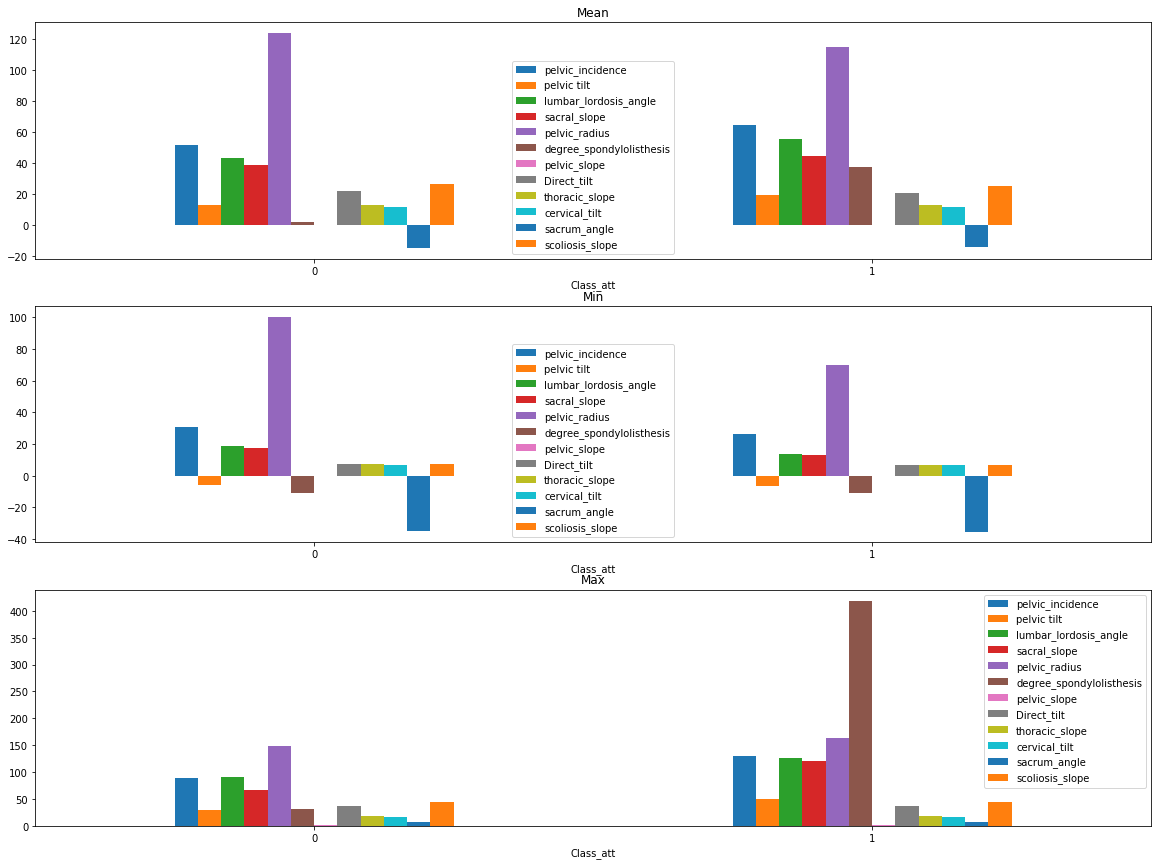

In [196]:
data2 = data.groupby('Class_att').mean()
data3 = data.groupby('Class_att').min()
data4 = data.groupby('Class_att').max()
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
data2.plot.bar(ax=plt.gca(), rot=0,  title="Mean")
plt.subplot(4,1,2)
data3.plot.bar(ax=plt.gca(), rot=0,  title="Min")
plt.subplot(4,1,3)
data4.plot.bar(ax=plt.gca(), rot=0,  title="Max")

## Histogram

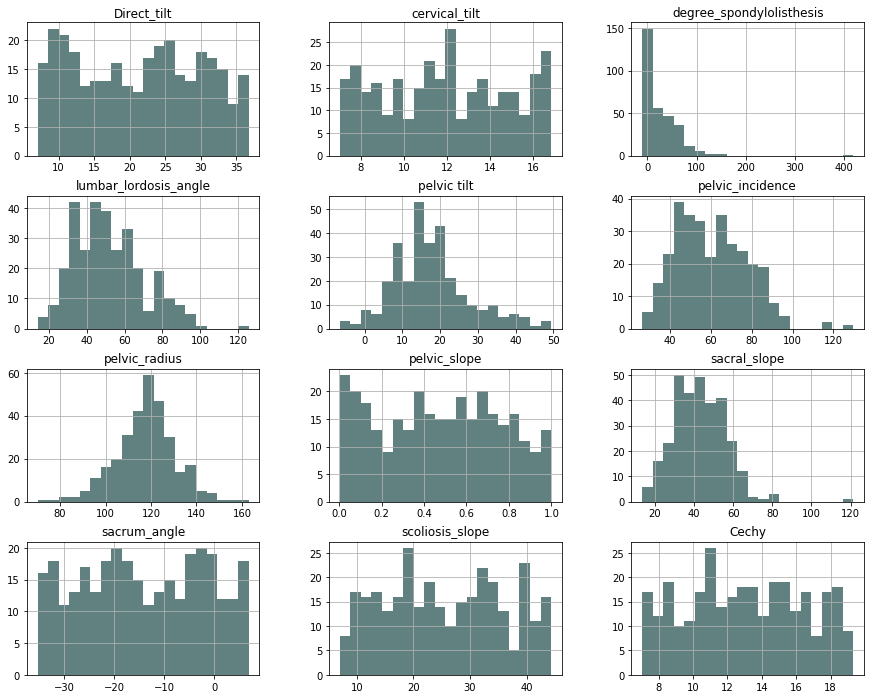

In [127]:
data2 = data.drop(["Class_att"], axis=1)
data2.hist(figsize=(15,12),bins = 20, color="#275452BC")
plt.title("Cechy")
plt.show()

In [107]:
from sklearn import preprocessing

x = data.drop(["Class_att"],axis=1)
y = data.Class_att.values
names = x.columns

scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=names)
x.head()


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.1,0.5,-0.7,-0.2,-1.4,-0.7,1.0,-1.0,0.4,1.2,-1.2,1.7
1,-1.2,-0.7,-1.5,-1.0,-0.3,-0.6,-0.2,-1.0,1.3,1.7,-0.9,-0.9
2,0.5,0.5,-0.1,0.3,-0.9,-0.8,0.0,0.6,1.3,1.6,-1.2,-0.6
3,0.5,0.7,-0.4,0.1,-1.2,-0.4,-0.4,0.3,-0.1,-0.2,-1.3,-0.7
4,-0.6,-0.8,-1.3,-0.2,-0.7,-0.5,0.2,1.6,0.9,-1.1,-0.2,-0.1


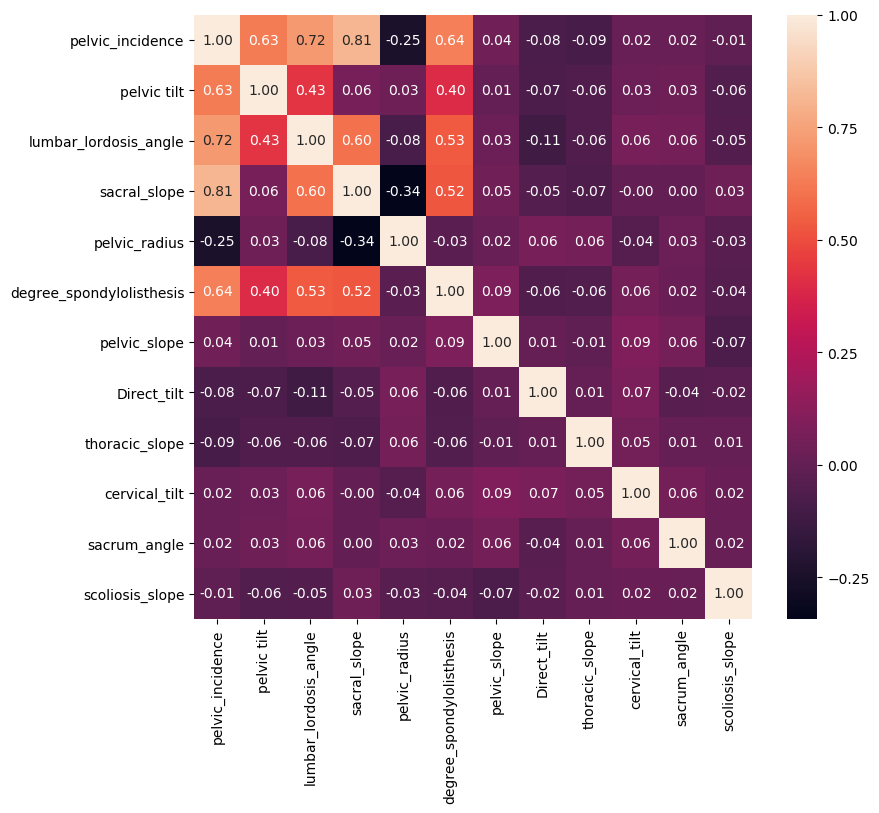

In [108]:
plt.figure(figsize=(9,8), dpi = 100)
sns.heatmap(x.corr(), annot=True, fmt='.2f')

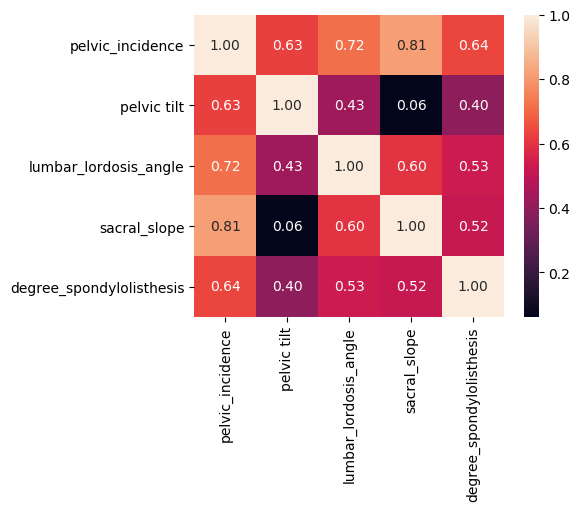

In [109]:
x = x.loc[:, ['pelvic_incidence',
              'pelvic tilt',
              'lumbar_lordosis_angle',
              'sacral_slope',
              'degree_spondylolisthesis'
              ]]
plt.figure(figsize=(5,4), dpi = 100)
sns.heatmap(x.corr(), annot=True, fmt='.2f')

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Regresja liniowa

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

print("Logistic regression test accuracy:", lr_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

Logistic regression test accuracy: 0.8172043010752689

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.88      0.87      0.88        69

   micro avg       0.82      0.82      0.82        93
   macro avg       0.76      0.77      0.76        93
weighted avg       0.82      0.82      0.82        93



In [169]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted_Abmormal','Predicted_Normal'],index=['Actual_Abnormal','Actual_Normal'])

,Predicted_Abmormal,Predicted_Normal
Actual_Abnormal,16,8
Actual_Normal,9,60


## Naiwny klasyfikator bayesowski

In [170]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)

print("Naive Bayes test accuracy:", gnb_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted_Abmormal','Predicted_Normal'],index=['Actual_Abnormal','Actual_Normal'])

Naive Bayes test accuracy: 0.7741935483870968

              precision    recall  f1-score   support

           0       0.54      0.83      0.66        24
           1       0.93      0.75      0.83        69

   micro avg       0.77      0.77      0.77        93
   macro avg       0.73      0.79      0.74        93
weighted avg       0.83      0.77      0.79        93



,Predicted_Abmormal,Predicted_Normal
Actual_Abnormal,20,4
Actual_Normal,17,52


## Algorytm k najbliższych sąsiadów (KNN)

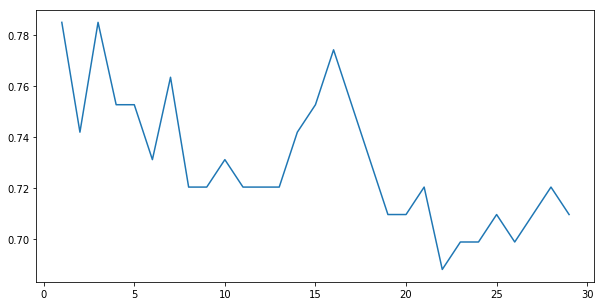

In [136]:
from sklearn.neighbors import KNeighborsClassifier

graph = []
for i in range(1, 30):
    knn_model = KNeighborsClassifier(i)
    knn_model.fit(x_train, y_train)
    graph.append(knn_model.score(x_test, y_test))

plt.figure(figsize=(10,5))    
sns.lineplot(x = range(1,30), y = graph)
plt.show()


In [171]:
knn_model = KNeighborsClassifier(3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print("KNN test accuracy:", knn_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted_Abmormal','Predicted_Normal'],index=['Actual_Abnormal','Actual_Normal'])

KNN test accuracy: 0.7849462365591398

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        24
           1       0.86      0.86      0.86        69

   micro avg       0.78      0.78      0.78        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.78      0.78      0.78        93



,Predicted_Abmormal,Predicted_Normal
Actual_Abnormal,14,10
Actual_Normal,10,59


## Metoda wektorów nośnych (SVM)

In [186]:
from sklearn.svm import SVC 
svclassifier = SVC(kernel='poly', degree=4)  
svclassifier.fit(x_train, y_train)  
y_pred = svclassifier.predict(x_test) 
print("SVM test accuracy:", knn_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted_Abmormal','Predicted_Normal'],index=['Actual_Abnormal','Actual_Normal'])

SVM test accuracy: 0.7849462365591398

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.74      1.00      0.85        69

   micro avg       0.74      0.74      0.74        93
   macro avg       0.37      0.50      0.43        93
weighted avg       0.55      0.74      0.63        93



,Predicted_Abmormal,Predicted_Normal
Actual_Abnormal,0,24
Actual_Normal,0,69


## Drzewa decyzyjne

In [172]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth=2)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

print("Tree test accuracy:", tree_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted_Abmormal','Predicted_Normal'],index=['Actual_Abnormal','Actual_Normal'])

Tree test accuracy: 0.8064516129032258

              precision    recall  f1-score   support

           0       0.59      0.79      0.68        24
           1       0.92      0.81      0.86        69

   micro avg       0.81      0.81      0.81        93
   macro avg       0.76      0.80      0.77        93
weighted avg       0.83      0.81      0.81        93



,Predicted_Abmormal,Predicted_Normal
Actual_Abnormal,19,5
Actual_Normal,13,56


## Losowy las decyzyjny

In [198]:
from sklearn.ensemble import RandomForestClassifier





n_trees = [10, 20, 50, 100, 150, 200, 250, 300]
for i in n_trees:
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(x_train,y_train)
    y_pred = random_forest.predict(x_test)
    print('number of trees: %d' %(i))
    correct_pred = 0
    for j,k in zip(y_test, y_pred):
        if j == k:
            correct_pred += 1
    print('correct predictions: %f' %(correct_pred/len(y_test) *100))
    matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predicted_Abmormal','Predicted_Normal'],index=['Actual_Abnormal','Actual_Normal'])
    print(matrix)

number of trees: 10
correct predictions: 83.870968
                 Predicted_Abmormal  Predicted_Normal
Actual_Abnormal                  18                 6
Actual_Normal                     9                60
number of trees: 20
correct predictions: 77.419355
                 Predicted_Abmormal  Predicted_Normal
Actual_Abnormal                  12                12
Actual_Normal                     9                60
number of trees: 50
correct predictions: 77.419355
                 Predicted_Abmormal  Predicted_Normal
Actual_Abnormal                  12                12
Actual_Normal                     9                60
number of trees: 100
correct predictions: 78.494624
                 Predicted_Abmormal  Predicted_Normal
Actual_Abnormal                  12                12
Actual_Normal                     8                61
number of trees: 150
correct predictions: 78.494624
                 Predicted_Abmormal  Predicted_Normal
Actual_Abnormal                  11      

In [199]:
rf_model = RandomForestClassifier(n_estimators = 20)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)  
print("Random tree forest test accuracy:", rf_model.score(x_test,y_test))
print(classification_report(y_test,y_pred)) 
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted_Abmormal','Predicted_Normal'],index=['Actual_Abnormal','Actual_Normal'])

Random tree forest test accuracy: 0.7741935483870968
              precision    recall  f1-score   support

           0       0.59      0.42      0.49        24
           1       0.82      0.90      0.86        69

   micro avg       0.77      0.77      0.77        93
   macro avg       0.70      0.66      0.67        93
weighted avg       0.76      0.77      0.76        93



,Predicted_Abmormal,Predicted_Normal
Actual_Abnormal,10,14
Actual_Normal,7,62
